In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


In [40]:
# Load your dataset 
original_data = pd.read_csv('originaldataset.csv')

In [41]:
# Define the encoding function
def encode_HadDiabetes(value):
    # Encode the values based on the given conditions
    if value == "Yes":
        return 1
    elif value == "Yes, but only during pregnancy (female)":
        return 1
    elif value == "No":
        return 0
    elif value == "No, pre-diabetes or borderline diabetes":
        return 0
    else:
        return None  # For unexpected or missing values (you can handle it as per your need)

# Apply the encoding function to the 'HadDiabetes' column
original_data['HadDiabetes'] = original_data['HadDiabetes'].apply(encode_HadDiabetes)

# Check the unique values and their counts
print(original_data['HadDiabetes'].value_counts())

HadDiabetes
0    202674
1     34956
Name: count, dtype: int64


In [42]:
# Transform the sex column using get_dummies
sex_dummies = pd.get_dummies(original_data['Sex'])
# Concatenate the df and the sex_dummies DataFrames   
DF = pd.concat([original_data, sex_dummies], axis=1)

# Drop the original sex column
DF = DF.drop(columns=['Sex'])

DF['Male']


0         False
1         False
2          True
3          True
4         False
          ...  
237625    False
237626    False
237627     True
237628    False
237629    False
Name: Male, Length: 237630, dtype: bool

In [ ]:
# you're working with df (change if needed)
original_data2 = DF.copy()  # If you want to keep original_data intact

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape the data (OneHotEncoder expects 2D array)
encoded_general_health = encoder.fit_transform(original_data2[['GeneralHealth']])

# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_general_health, columns=encoder.categories_[0])

# Concatenate the encoded columns back to the original DataFrame
df = pd.concat([original_data2, encoded_df], axis=1)

# Optionally drop the original 'GeneralHealth' column
df.drop(columns=['GeneralHealth', 'State', 'AgeCategory','SmokerStatus', 'ECigaretteUsage','RaceEthnicityCategory','TetanusLast10Tdap'], axis=1, inplace=True)




print(df.head())




   PatientID  HeightInMeters  WeightInKilograms        BMI  HadHeartAttack  \
0          1            1.63          84.820000  32.099998               0   
1          2            1.60          71.669998  27.990000               0   
2          3            1.78          71.209999  22.530001               0   
3          4            1.78          95.250000  30.129999               0   
4          5            1.68          78.019997  27.760000               0   

   HadAngina  HadStroke  HadAsthma  HadSkinCancer  HadCOPD  ...  \
0          1          0          1              1        0  ...   
1          0          0          0              0        0  ...   
2          0          0          0              0        0  ...   
3          0          0          0              0        0  ...   
4          0          0          0              0        0  ...   

   PneumoVaxEver  HighRiskLastYear  CovidPos  Female   Male  Excellent  Fair  \
0              1                 0         1    

In [44]:


# List of numerical columns you want to scale
numerical_cols = ['HeightInMeters', 'WeightInKilograms', 'BMI']

# Apply StandardScaler
scaler = StandardScaler()
original_data2[numerical_cols] = scaler.fit_transform(original_data2[numerical_cols])

In [45]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(df.drop('HadDiabetes', axis=1), df['HadDiabetes'])


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


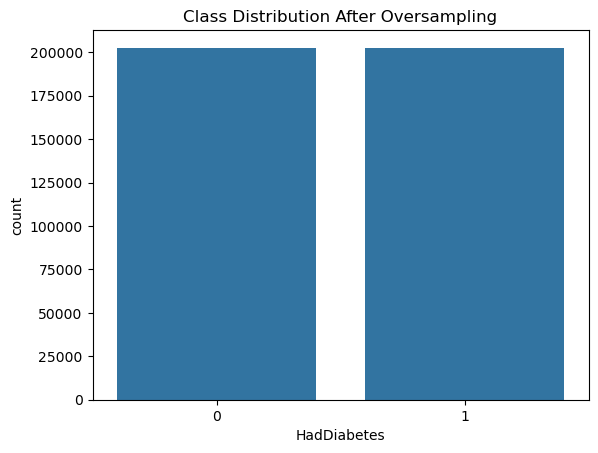

In [46]:
resampled_data = pd.DataFrame(X_resampled, columns=original_data.drop('HadDiabetes', axis=1).columns)
resampled_data['HadDiabetes'] = y_resampled

sns.countplot(x='HadDiabetes', data=resampled_data)
plt.title("Class Distribution After Oversampling")
plt.show()

In [54]:
resampled_data.head()




,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadDiabetes
0,1,NaN,NaN,NaN,NaN,1.63,84.820000,32.099998,0,1,...,1,NaN,0,0,0,1,NaN,0,1,1
1,2,NaN,NaN,NaN,NaN,1.60,71.669998,27.990000,0,0,...,0,NaN,0,0,1,1,NaN,0,0,0
2,3,NaN,NaN,NaN,NaN,1.78,71.209999,22.530001,0,0,...,0,NaN,1,0,0,0,NaN,0,0,0
3,4,NaN,NaN,NaN,NaN,1.78,95.250000,30.129999,0,0,...,0,NaN,0,0,1,1,NaN,0,0,1
4,5,NaN,NaN,NaN,NaN,1.68,78.019997,27.760000,0,0,...,1,NaN,0,0,1,0,NaN,0,0,0


In [ ]:
data = resampled_data.drop(columns=['PatientID','State','Sex','GeneralHealth','AgeCategory','TetanusLast10Tdap','RaceEthnicityCategory', 'ECigaretteUsage', 'SmokerStatus'])


In [62]:
# Scaling the numeric columns
df_scaled = StandardScaler().fit_transform(data)
# Creating a DataFrame with with the scaled data
df_transformed = pd.DataFrame(df_scaled)
# Display sample data
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.722013,-0.088295,0.350521,-0.204059,4.578140,-0.169912,2.969640,4.169108,-0.238909,-0.416044,...,-0.152071,-0.219938,1.240082,-0.780955,-0.571079,-0.971713,1.230202,-0.161382,1.945917,1.0
1,-1.021374,-0.718507,-0.288507,-0.204059,-0.218429,-0.169912,-0.336741,-0.239859,-0.238909,-0.416044,...,-0.152071,-0.219938,-0.806398,-0.780955,-0.571079,1.029110,1.230202,-0.161382,-0.513896,-1.0
2,0.774793,-0.740552,-1.137434,-0.204059,-0.218429,-0.169912,-0.336741,-0.239859,-0.238909,-0.416044,...,-0.152071,-0.219938,-0.806398,1.280483,-0.571079,-0.971713,-0.812875,-0.161382,-0.513896,-1.0
3,0.774793,0.411561,0.044223,-0.204059,-0.218429,-0.169912,-0.336741,-0.239859,-0.238909,-0.416044,...,-0.152071,-0.219938,-0.806398,-0.780955,-0.571079,1.029110,1.230202,-0.161382,-0.513896,1.0
4,-0.223078,-0.414184,-0.324267,-0.204059,-0.218429,-0.169912,-0.336741,-0.239859,-0.238909,-0.416044,...,-0.152071,-0.219938,1.240082,-0.780955,-0.571079,1.029110,-0.812875,-0.161382,-0.513896,-1.0
